In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('E:/Projects/heart-disease-uci/heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [8]:
data['sex'].value_counts() # 1-male and 0-female

1    207
0     96
Name: sex, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
s = StandardScaler()

In [11]:
new_data=s.fit_transform(data)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
new_data[0,:]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271,  0.91452919])

In [13]:
corr_matrix=data.corr()
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [14]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE472953C8>,
      dtype=object)

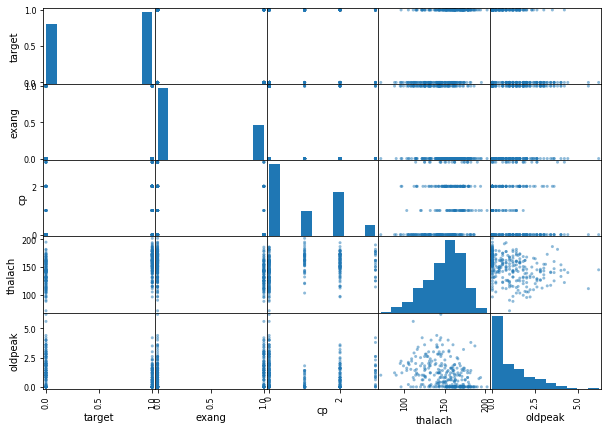

In [15]:
att = ['target','exang','cp','thalach','oldpeak']
scatter_matrix(data[att],figsize=(10,7))

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
X=data.drop('target',axis=1)
y= data['target']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
y_pred= rf.predict(X_test)

In [54]:
 from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

In [55]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8604651162790697
0.74


In [56]:
f1_score(y_test, y_pred)

0.7956989247311828

In [57]:
accuracy_score(y_test, y_pred)

0.7912087912087912

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test, y_pred)

array([[35,  6],
       [13, 37]], dtype=int64)